<a href="https://colab.research.google.com/github/Only-Mike/ADHD/blob/main/ADHD_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!git clone 'https://github.com/Only-Mike/ADHD.git'

fatal: destination path 'ADHD' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv('/content/ADHD/datasets/KKI_phenotypic.csv')

In [ ]:
df

,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,...,Performance IQ,Full2 IQ,Full4 IQ,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,2371032,3,0,10.73,1,0,NaN,2,47,55,...,119,NaN,122,1,1,NaN,NaN,NaN,1,NaN
1,2026113,3,0,12.99,1,1,NaN,2,90,89,...,108,NaN,106,1,1,NaN,NaN,NaN,1,NaN
2,3434578,3,0,8.12,1,0,NaN,2,42,42,...,98,NaN,89,1,1,NaN,NaN,NaN,1,NaN
3,8628223,3,0,10.81,1,0,Simple phobia,2,42,49,...,86,NaN,97,1,1,NaN,NaN,NaN,1,NaN
4,1623716,3,0,12.65,1,1,NaN,2,87,90,...,88,NaN,89,1,1,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2360428,3,1,8.56,1,0,NaN,2,43,43,...,102,NaN,113,2,1,NaN,NaN,NaN,1,NaN
79,2903997,3,0,11.91,1,0,NaN,2,44,49,...,121,NaN,126,2,1,NaN,NaN,NaN,1,NaN
80,2703289,3,1,11.10,1,0,NaN,2,41,40,...,117,NaN,109,2,1,NaN,NaN,NaN,1,NaN
81,1577042,3,1,9.06,1,1,NaN,2,78,73,...,90,NaN,90,2,1,NaN,NaN,NaN,1,NaN


In [ ]:
print(df.columns)

Index(['ScanDir ID', 'Site', 'Gender', 'Age', 'Handedness', 'DX',
       'Secondary Dx ', 'ADHD Measure', 'ADHD Index', 'Inattentive',
       'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ', 'Performance IQ',
       'Full2 IQ', 'Full4 IQ', 'Med Status', 'QC_Rest_1', 'QC_Rest_2',
       'QC_Rest_3', 'QC_Rest_4', 'QC_Anatomical_1', 'QC_Anatomical_2'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ScanDir ID       83 non-null     int64  
 1   Site             83 non-null     int64  
 2   Gender           83 non-null     int64  
 3   Age              83 non-null     float64
 4   Handedness       83 non-null     int64  
 5   DX               83 non-null     int64  
 6   Secondary Dx     15 non-null     object 
 7   ADHD Measure     83 non-null     int64  
 8   ADHD Index       83 non-null     int64  
 9   Inattentive      83 non-null     int64  
 10  Hyper/Impulsive  83 non-null     int64  
 11  IQ Measure       83 non-null     int64  
 12  Verbal IQ        83 non-null     int64  
 13  Performance IQ   83 non-null     int64  
 14  Full2 IQ         0 non-null      float64
 15  Full4 IQ         83 non-null     int64  
 16  Med Status       83 non-null     int64  
 17  QC_Rest_1        8

In [ ]:
#dropping unrelevant columns
df = df.drop(columns = ['Site', 'ADHD Measure', 'IQ Measure', 'Full2 IQ', 'QC_Rest_1', 'QC_Rest_2', 'QC_Rest_3', 'QC_Rest_4', 'QC_Anatomical_1', 'QC_Anatomical_2'])

In [ ]:
#the remaining columns
df.columns

Index(['ScanDir ID', 'Gender', 'Age', 'Handedness', 'DX', 'Secondary Dx ',
       'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'Verbal IQ',
       'Performance IQ', 'Full4 IQ', 'Med Status'],
      dtype='object')

In [ ]:
df.info() #There is zero null values left in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ScanDir ID       83 non-null     int64  
 1   Gender           83 non-null     int64  
 2   Age              83 non-null     float64
 3   Handedness       83 non-null     int64  
 4   DX               83 non-null     int64  
 5   Secondary Dx     15 non-null     object 
 6   ADHD Index       83 non-null     int64  
 7   Inattentive      83 non-null     int64  
 8   Hyper/Impulsive  83 non-null     int64  
 9   Verbal IQ        83 non-null     int64  
 10  Performance IQ   83 non-null     int64  
 11  Full4 IQ         83 non-null     int64  
 12  Med Status       83 non-null     int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 8.6+ KB


In [ ]:
df.describe() #We have some false values in the following columns: ADHD Index, Inattentive and Hyper/Impulsive

,ScanDir ID,Gender,Age,Handedness,DX,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,Full4 IQ,Med Status
count,8.300000e+01,83.000000,83.000000,83.000000,83.00000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,3.449295e+06,0.554217,10.243253,0.927711,0.39759,14.963855,15.265060,15.734940,113.060241,108.686747,110.012048,1.180723
std,2.098556e+06,0.500073,1.346601,0.303762,0.79541,198.036178,198.098958,198.141738,14.693909,11.995861,11.935287,0.387128
min,1.018959e+06,0.000000,8.020000,0.000000,0.00000,-999.000000,-999.000000,-999.000000,81.000000,79.000000,85.000000,1.000000
25%,2.005148e+06,0.000000,9.100000,1.000000,0.00000,42.000000,42.000000,43.000000,104.000000,102.000000,101.500000,1.000000
50%,2.768273e+06,1.000000,10.120000,1.000000,0.00000,46.000000,48.000000,48.000000,112.000000,108.000000,111.000000,1.000000
75%,3.915209e+06,1.000000,11.095000,1.000000,1.00000,61.000000,60.000000,59.500000,121.500000,119.000000,119.000000,1.000000
max,9.922944e+06,1.000000,12.990000,2.000000,3.00000,90.000000,90.000000,90.000000,146.000000,137.000000,134.000000,2.000000


In [ ]:
#Round age for fewer unique values and making into integer
df['Age'] = df['Age'].round(decimals = 0)
df['Age'] = df['Age'].astype(int)

In [ ]:
#Removes rows with -999 in the following columns
df = df[df['Inattentive'] != -999]
df = df[df['Hyper/Impulsive'] != -999]
df = df[df['ADHD Index'] != -999]

In [ ]:
#Previous code removed only 3 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 82
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ScanDir ID       80 non-null     int64 
 1   Gender           80 non-null     int64 
 2   Age              80 non-null     int64 
 3   Handedness       80 non-null     int64 
 4   DX               80 non-null     int64 
 5   Secondary Dx     14 non-null     object
 6   ADHD Index       80 non-null     int64 
 7   Inattentive      80 non-null     int64 
 8   Hyper/Impulsive  80 non-null     int64 
 9   Verbal IQ        80 non-null     int64 
 10  Performance IQ   80 non-null     int64 
 11  Full4 IQ         80 non-null     int64 
 12  Med Status       80 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 8.8+ KB


In [ ]:
#But as we can see with the min function, it removed the false values of -999
df.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


ScanDir ID         1018959
Gender                   0
Age                      8
Handedness               0
DX                       0
ADHD Index              40
Inattentive             40
Hyper/Impulsive         41
Verbal IQ               81
Performance IQ          79
Full4 IQ                85
Med Status               1
dtype: int64

In [ ]:
df['Secondary Dx '].unique()

array([nan, 'Simple phobia', 'Simple Phobia', 'simple phobias', 'ODD',
       'Simple Phobia ', 'ODD; Phobia', 'Specific phobia', 'Phobia',
       'social and simple phobia '], dtype=object)

In [ ]:
#Making none secondary dx into 0 and any secondary dx into 1
df['Secondary Dx '].replace(('Simple phobia', 'Simple Phobia', 'simple phobias', 'ODD', 'Simple Phobia ', 'ODD; Phobia', 'Specific phobia', 'Phobia', 'social and simple phobia '), (1, 1, 1, 1, 1, 1, 1, 1, 1), inplace=True)
df['Secondary Dx '] = df['Secondary Dx '].fillna(0).astype(int)

In [ ]:
#Checking that it worked as intended
df['Secondary Dx '].unique()

array([0, 1])

## Because of the low amount of rows we will use SDV (Synthetic Data Vault) to create additonal rows for our models to train on

In [ ]:
pip install sdv -q

In [ ]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(df)

In [ ]:
#Creating the synthetic data
synthetic_data = model.sample(500)
synthetic_data.head()

,ScanDir ID,Gender,Age,Handedness,DX,Secondary Dx,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,Full4 IQ,Med Status
0,7121512,1,9,0,0,0,41,44,41,98,108,107,1
1,2878771,1,8,1,0,0,41,40,41,83,122,107,1
2,6112417,1,11,1,1,0,85,84,83,102,117,116,1
3,1655998,1,10,1,1,0,54,57,65,101,99,110,1
4,3981018,1,12,1,2,1,70,65,61,125,119,116,1


In [ ]:
#Appending the synthetic data to the original df
df = df.append([synthetic_data])

In [ ]:
#There is now 580 rows each with a unique id
df.nunique()

ScanDir ID         580
Gender               2
Age                  6
Handedness           3
DX                   4
Secondary Dx         2
ADHD Index          48
Inattentive         49
Hyper/Impulsive     49
Verbal IQ           65
Performance IQ      57
Full4 IQ            50
Med Status           2
dtype: int64

##The following section is about scaling our data

In [ ]:
#We will scale the data which requires the following tool
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
!pip install -U matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = df.loc[~df.index.duplicated(), :]

In [ ]:
# with the scaler.fit_transfor we learn x-y relationships and transform the data.
df_scaled = scaler.fit_transform(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ScanDir ID       500 non-null    int64
 1   Gender           500 non-null    int64
 2   Age              500 non-null    int64
 3   Handedness       500 non-null    int64
 4   DX               500 non-null    int64
 5   Secondary Dx     500 non-null    int64
 6   ADHD Index       500 non-null    int64
 7   Inattentive      500 non-null    int64
 8   Hyper/Impulsive  500 non-null    int64
 9   Verbal IQ        500 non-null    int64
 10  Performance IQ   500 non-null    int64
 11  Full4 IQ         500 non-null    int64
 12  Med Status       500 non-null    int64
dtypes: int64(13)
memory usage: 54.7 KB


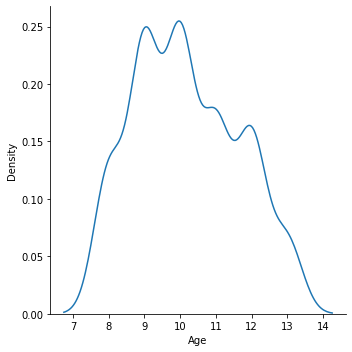

In [ ]:
#Age pre-scaling
sns.displot(data=df, 
            x="Age", 
            kind="kde")

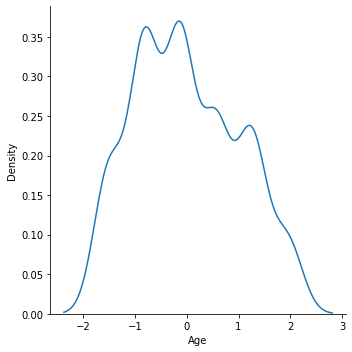

In [ ]:
#Age post-scaling
sns.displot(data=pd.DataFrame(df_scaled, columns=df.columns), 
            x="Age",
            kind="kde")

##The following section is for PCA, which is a tool for dimensionality reduction.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
# fit and transform the data
df_reduced_pca = pca.fit_transform(df_scaled)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

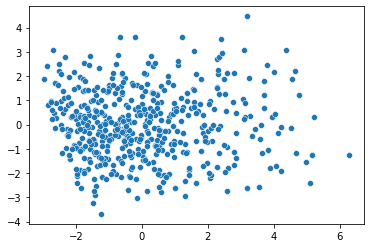

In [ ]:
#Plotting the reduced data (Tænker denne egentlig bare skal fjernes, da vi har en mere fancy graf under)
sns.scatterplot(df_reduced_pca[:,0],df_reduced_pca[:,1])

In [ ]:
import altair as alt
vis_data = pd.DataFrame(df_reduced_pca)
vis_data['Gender'] = df['Gender']
vis_data['Age'] = df['Age']
vis_data.columns = ['x', 'y', 'Gender', 'Age']

In [ ]:
#Plotting the reduced data
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['Gender', 'Age']
).interactive()

alt.Chart(...)

<AxesSubplot:>

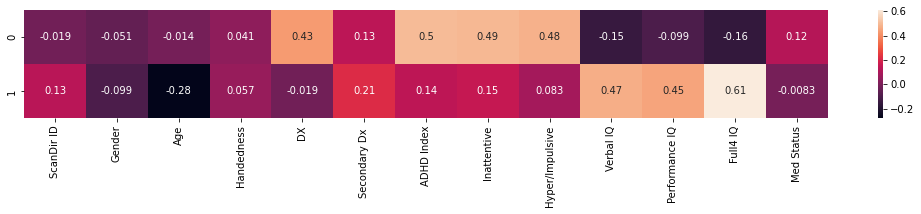

In [ ]:
#Correlation between components
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame(pca.components_, columns=df.columns), annot=True)

<AxesSubplot:>

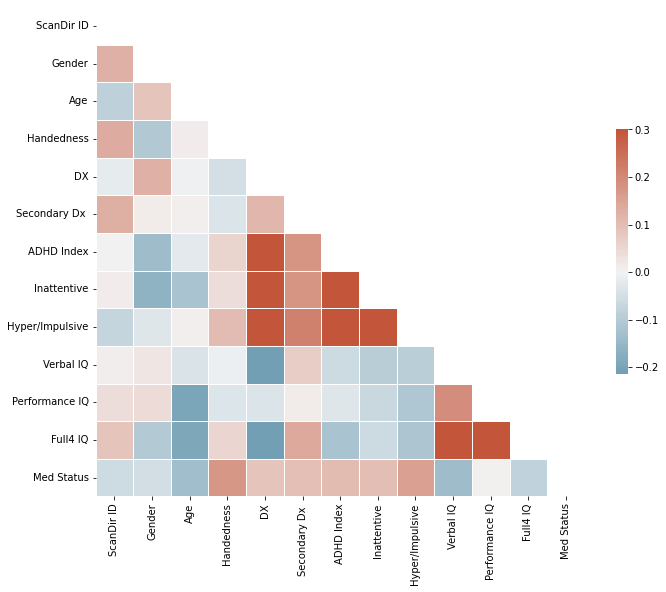

In [ ]:
#Correlation check

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##The following section is for our UMAP model

In [ ]:
!pip install umap-learn -q
import umap

In [ ]:
umap_scaler = umap.UMAP()

In [ ]:
embeddings = umap_scaler.fit_transform(df_scaled)

In [ ]:
from matplotlib import rcParams

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

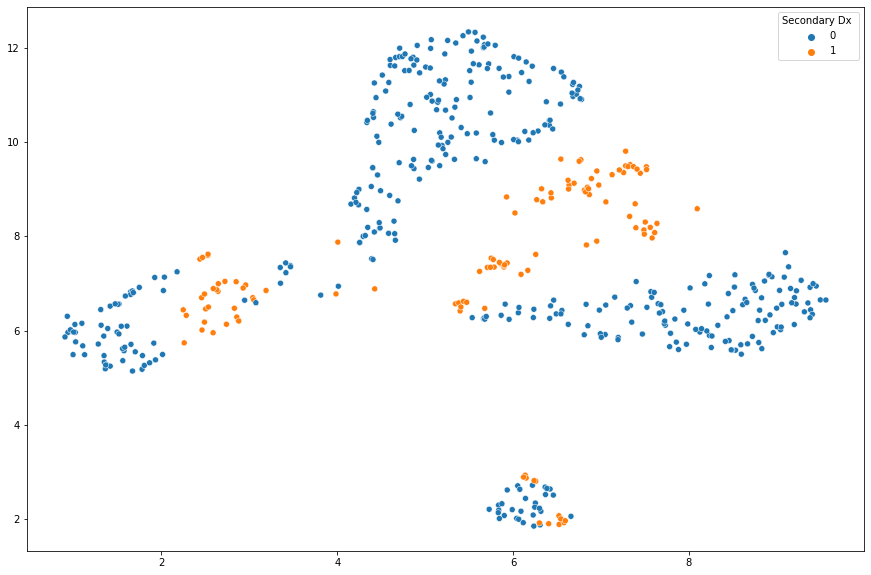

In [ ]:
#Clearly there is some difference between people with a secondary dianosis and those without
rcParams['figure.figsize'] = 15,10
sns.scatterplot(embeddings[:,0],embeddings[:,1], hue = df['Secondary Dx '], sizes=(400, 400))

##The following section is for Kmeans clustering

In [ ]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3)

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    Sum_of_squared_distances.append(km.inertia_)

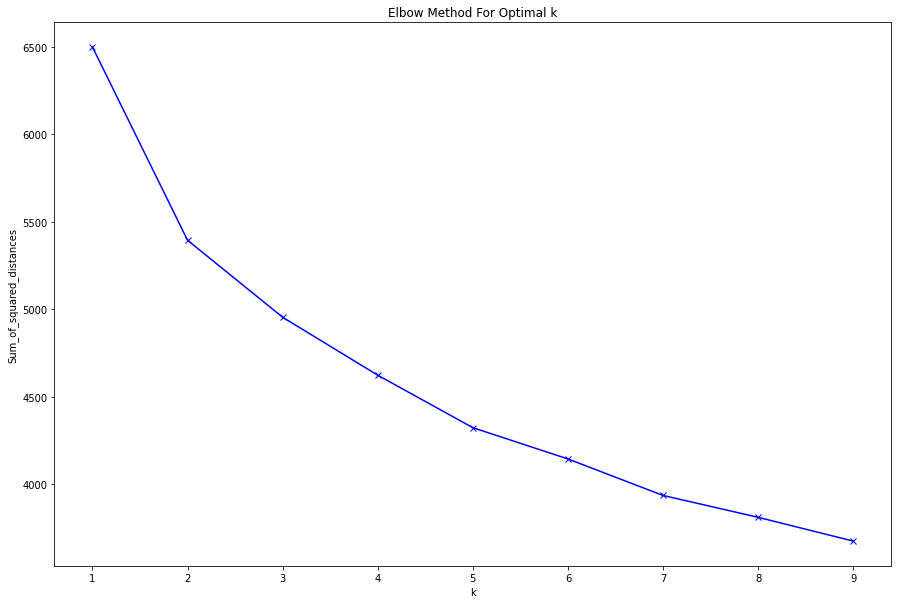

In [ ]:
#Using the elbow method to plot for the optimal k (Noget i tvivl om det vil give mest mening med 3 eller 6)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

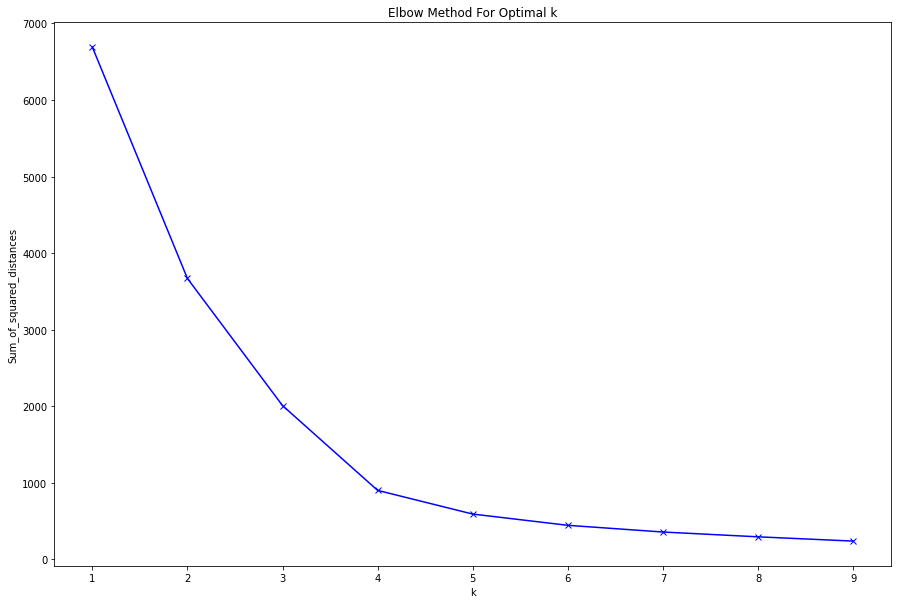

In [ ]:
umap_scaler_km = umap.UMAP(n_components=6)
embeddings_km = umap_scaler.fit_transform(df_scaled)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
clusterer.fit(df_scaled)

KMeans(n_clusters=3)

In [ ]:
df['cluster'] = clusterer.labels_

In [ ]:
df.groupby('cluster').Inattentive.mean()

cluster
0    49.623762
1    70.773438
2    51.205882
Name: Inattentive, dtype: float64

In [ ]:
vis_data = pd.DataFrame(embeddings)
vis_data['Gender'] = df['Gender']
vis_data['cluster'] = df['cluster']
vis_data['Secondary Dx '] = df['Secondary Dx ']
vis_data.columns = ['x', 'y', 'Gender', 'cluster','Secondary Dx ']

In [ ]:
vis_data['cluster'].value_counts()

0    202
2    170
1    128
Name: cluster, dtype: int64

In [ ]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['Gender', 'Secondary Dx '],
    color=alt.Color('cluster:N', scale=alt.Scale(scheme='dark2'))
).interactive()

alt.Chart(...)